# Importing Python libraries

In [118]:
import numpy as np 
import pandas as pd 
import time
import math
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
import warnings
warnings.filterwarnings("ignore")

# Loading dataset

In [119]:
data = pd.read_csv('E:\Programming For BA\stack-overflow-developer-survey-2021\survey_results_public.csv')

# Exploratory data analysis

# Five top records of data

In [120]:
data.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


# Five last records of data

In [121]:
data.tail()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
83434,83435,I am a developer by profession,Employed full-time,United States of America,Texas,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,160500.0
83435,83436,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Benin,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",4,...,18-24 years old,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,3960.0
83436,83437,I am a developer by profession,Employed full-time,United States of America,New Jersey,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0
83437,83438,I am a developer by profession,Employed full-time,Canada,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Online Courses or Certification;Books / Physic...,5,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a mood or emotional disorder (e.g. depr...,Appropriate in length,Neither easy nor difficult,816816.0
83438,83439,I am a developer by profession,Employed full-time,Brazil,NaN,NaN,"Professional degree (JD, MD, etc.)",11 - 17 years,School,14,...,18-24 years old,Man,No,Straight / Heterosexual,Hispanic or Latino/a/x,None of the above,None of the above,Appropriate in length,Easy,21168.0


# Columns/features in data

In [122]:
data.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

# Length of data

In [123]:
print('length of data is', len(data))

length of data is 83439


# Shape of data

In [124]:
data.shape

(83439, 48)

# Data information

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

# Data types of all coloumns

In [126]:
data.dtypes

ResponseId                        int64
MainBranch                       object
Employment                       object
Country                          object
US_State                         object
UK_Country                       object
EdLevel                          object
Age1stCode                       object
LearnCode                        object
YearsCode                        object
YearsCodePro                     object
DevType                          object
OrgSize                          object
Currency                         object
CompTotal                       float64
CompFreq                         object
LanguageHaveWorkedWith           object
LanguageWantToWorkWith           object
DatabaseHaveWorkedWith           object
DatabaseWantToWorkWith           object
PlatformHaveWorkedWith           object
PlatformWantToWorkWith           object
WebframeHaveWorkedWith           object
WebframeWantToWorkWith           object
MiscTechHaveWorkedWith           object


# Checking Null Values

In [127]:
data[data.isnull().any(axis=1)].head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


# Count of Null values

In [128]:
np.sum(data.isnull().any(axis=1))

83439

# Data Description

In [129]:
data.describe()

,ResponseId,CompTotal,ConvertedCompYearly
count,83439.000000,4.718300e+04,4.684400e+04
mean,41720.000000,2.119407e+69,1.184262e+05
std,24086.908893,4.603702e+71,5.272944e+05
min,1.000000,0.000000e+00,1.000000e+00
25%,20860.500000,1.600000e+04,2.702500e+04
50%,41720.000000,6.700000e+04,5.621100e+04
75%,62579.500000,1.400000e+05,1.000000e+05
max,83439.000000,1.000000e+74,4.524131e+07


# Data Cleaning

In [130]:

data=data.drop(columns=['US_State','UK_Country'])
data.head()

,ResponseId,MainBranch,Employment,Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...",...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


## Data Visualization

[]

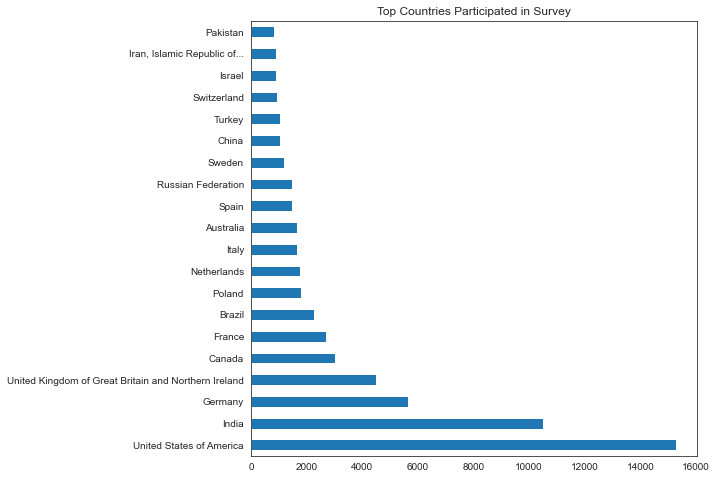

In [131]:
## Country counts
plt.figure(figsize=(8,8))
data['Country'].value_counts()[:20].plot(kind='barh')
plt.title('Top Countries Participated in Survey')
plt.plot()

[]

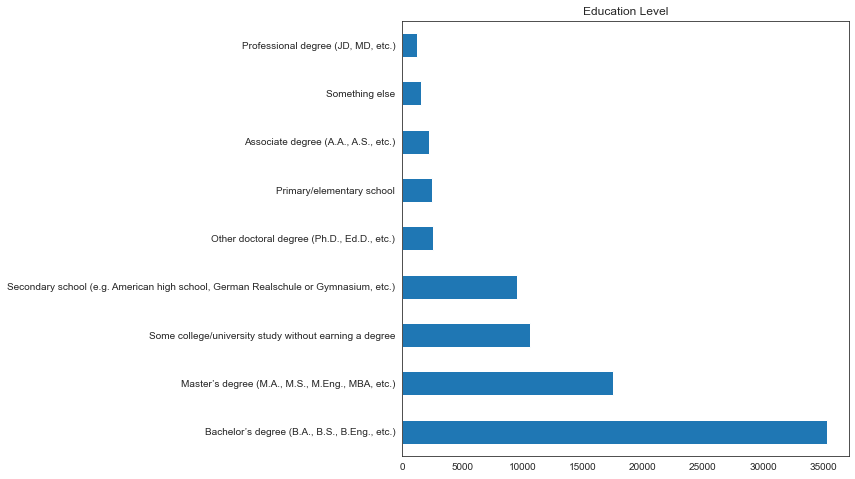

In [132]:
## Educational Level counts
plt.figure(figsize=(8,8))
data['EdLevel'].value_counts().plot(kind='barh')
plt.title('Education Level')
plt.plot()

[]

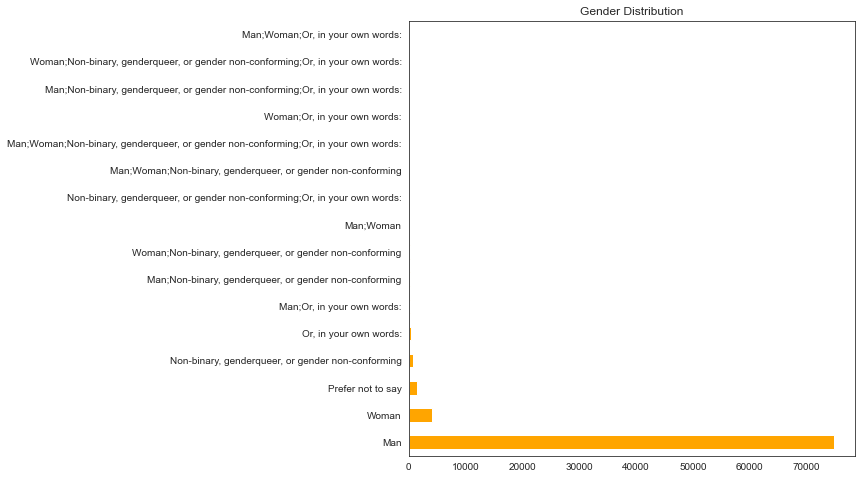

In [133]:
## Gender Distribution counts
plt.figure(figsize=(8,8))
data['Gender'].value_counts().plot(kind='barh',color='orange')
plt.title('Gender Distribution')
plt.plot()

[]

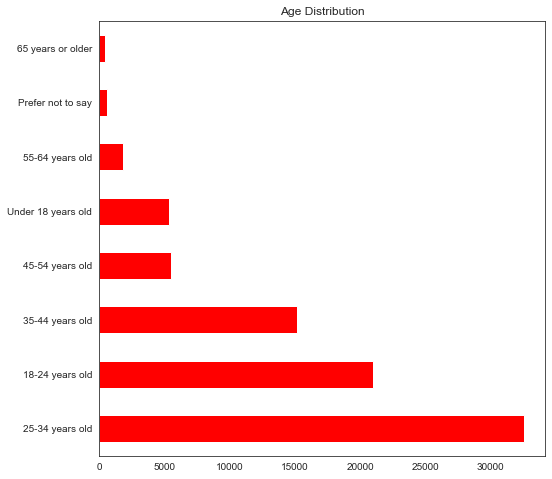

In [134]:
## Age Distribution counts
plt.figure(figsize=(8,8))
data['Age'].value_counts().plot(kind='barh',color='red')
plt.title('Age Distribution')
plt.plot()

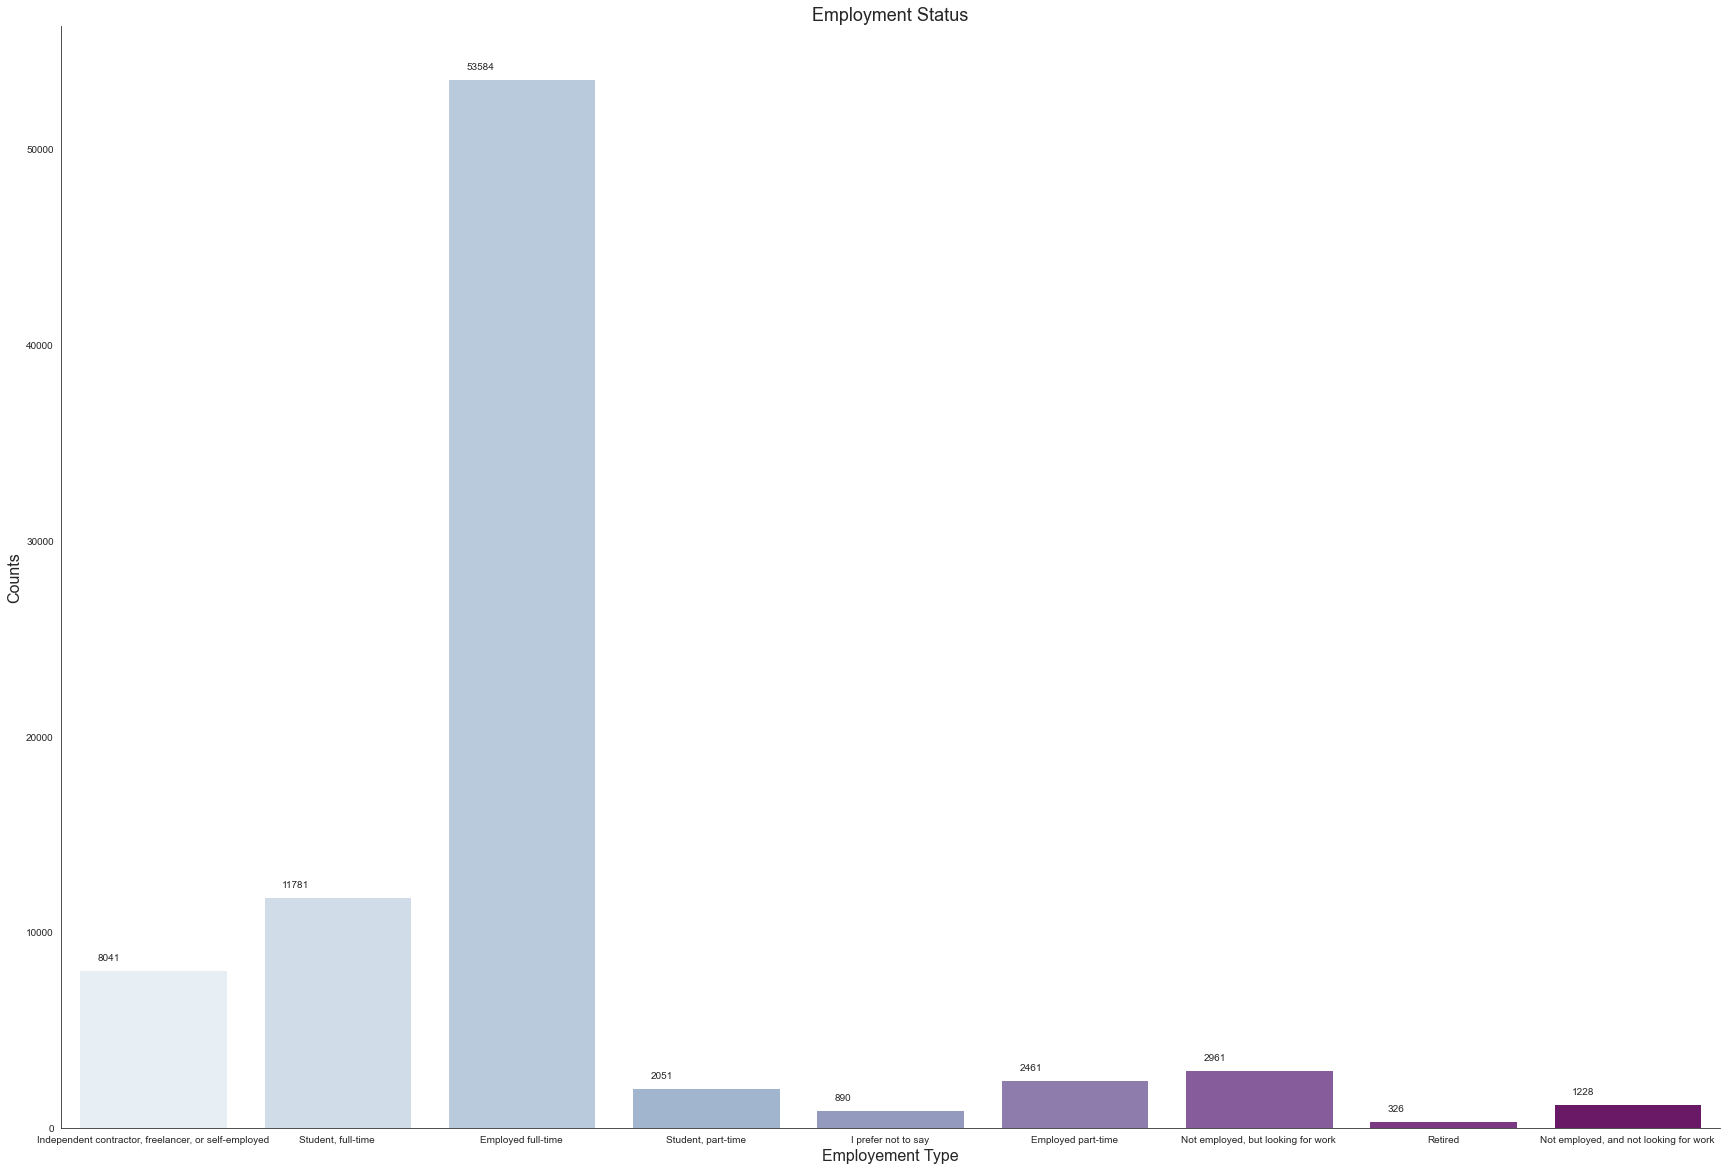

In [135]:
# Count plot to show the number of Employees belonging to each EmploymentType
sns.set_style("white")
g = sns.factorplot(x="Employment", data=data, kind="count",
                   palette="BuPu", size=16, aspect=1.5)
g.ax.xaxis.set_label_text("Employement Type",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Counts", fontdict= {'size':16})
g.ax.set_title("Employment Status",fontdict= {'size':18})
# to get the counts on the top heads of the bar
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+500))

[]

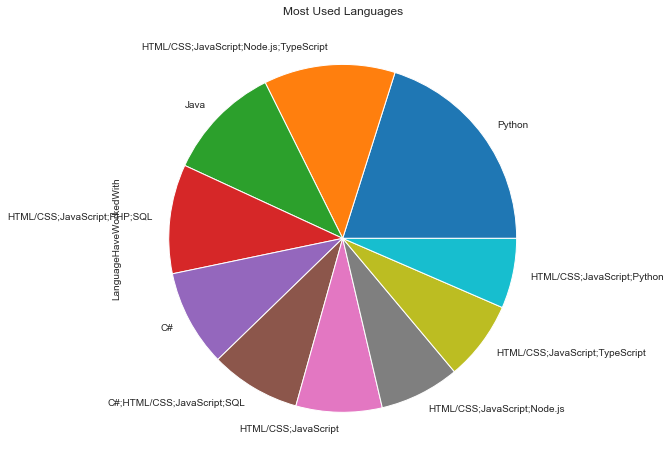

In [136]:

## Language counts
plt.figure(figsize=(8,8))
data['LanguageHaveWorkedWith'].value_counts()[:10].plot(kind='pie')
plt.title('Most Used Languages')
plt.plot()

[]

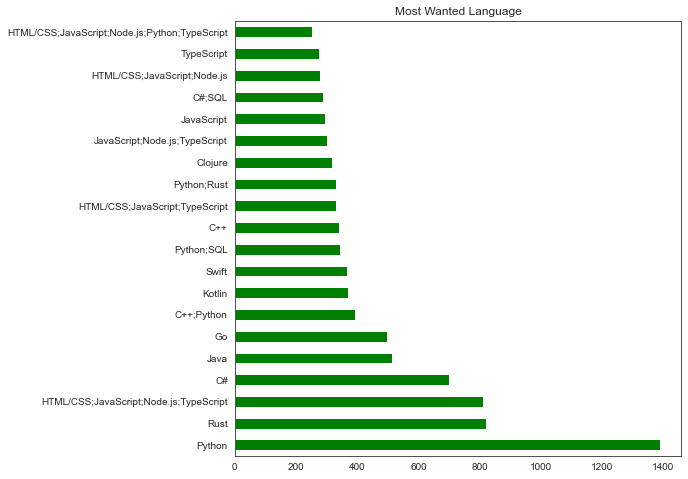

In [137]:
#LanguageWantToWorkWith counts

plt.figure(figsize=(8,8))
data['LanguageWantToWorkWith'].value_counts()[:20].plot(kind='barh',color='green')
plt.title('Most Wanted Language')
plt.plot()

[]

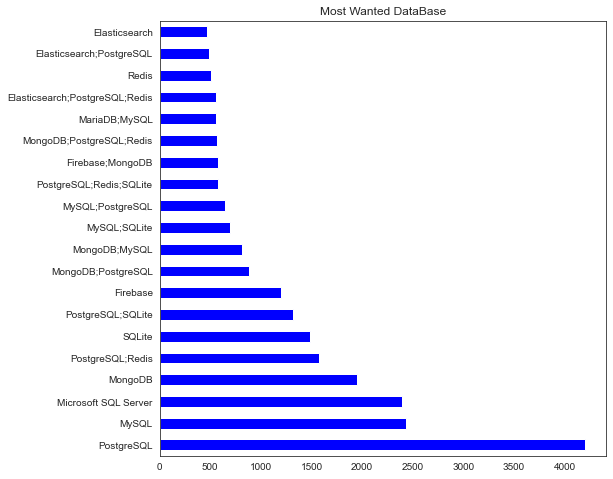

In [138]:
#DatabaseWanttoWorkwith counts

plt.figure(figsize=(8,8))
data['DatabaseWantToWorkWith'].value_counts()[:20].plot(kind='barh',color='blue')
plt.title('Most Wanted DataBase')
plt.plot()

[]

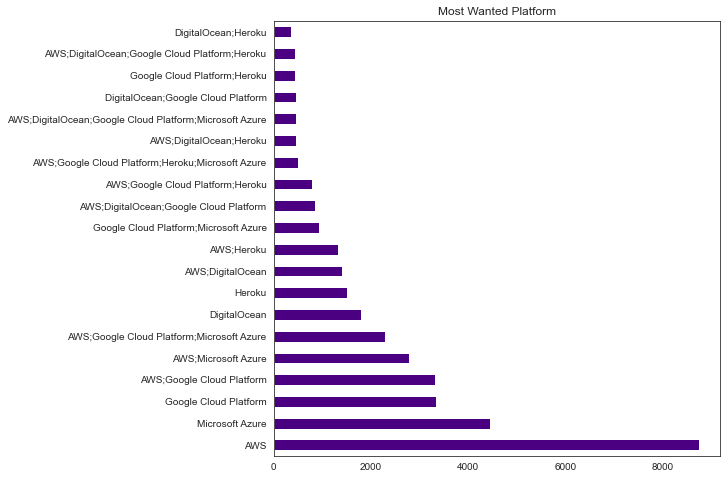

In [139]:
#PlatformWantToWorkWith


plt.figure(figsize=(8,8))
data['PlatformWantToWorkWith'].value_counts()[:20].plot(kind='barh',color='Indigo')
plt.title('Most Wanted Platform')
plt.plot()

[]

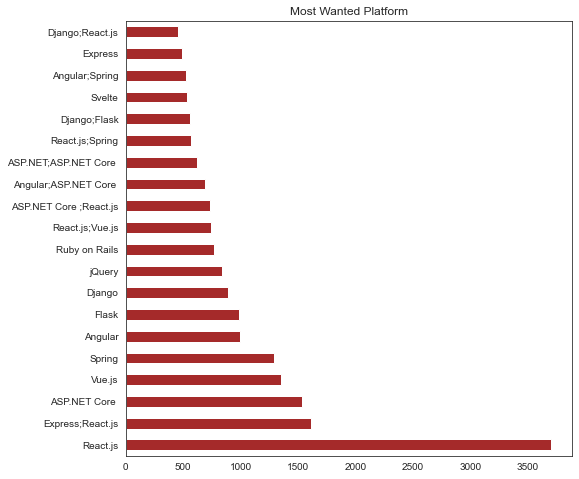

In [140]:
#WebFrameWantToWorkWith
plt.figure(figsize=(8,8))
data['WebframeWantToWorkWith'].value_counts()[:20].plot(kind='barh',color='brown')
plt.title('Most Wanted Platform')
plt.plot()
#LanguageWantToWorkWith
## Country counts

In [141]:
data.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'EdLevel',
       'Age1stCode', 'LearnCode', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

## Bivariate Analysis

In [142]:
data['Gender'].value_counts()

Man                                                                                   74817
Woman                                                                                  4120
Prefer not to say                                                                      1442
Non-binary, genderqueer, or gender non-conforming                                       690
Or, in your own words:                                                                  413
Man;Or, in your own words:                                                              268
Man;Non-binary, genderqueer, or gender non-conforming                                   252
Woman;Non-binary, genderqueer, or gender non-conforming                                 147
Man;Woman                                                                                41
Non-binary, genderqueer, or gender non-conforming;Or, in your own words:                 21
Man;Woman;Non-binary, genderqueer, or gender non-conforming                     

In [143]:
list_count=['United States of America','India','United Kingdom of Great Britain and Northern Ireland','Canada','Germany']
sel_gender=['Man','Woman']

In [144]:
top_cnt=data[data['Country'].isin(list_count)]
top_cnt=top_cnt[data['Gender'].isin(sel_gender)]

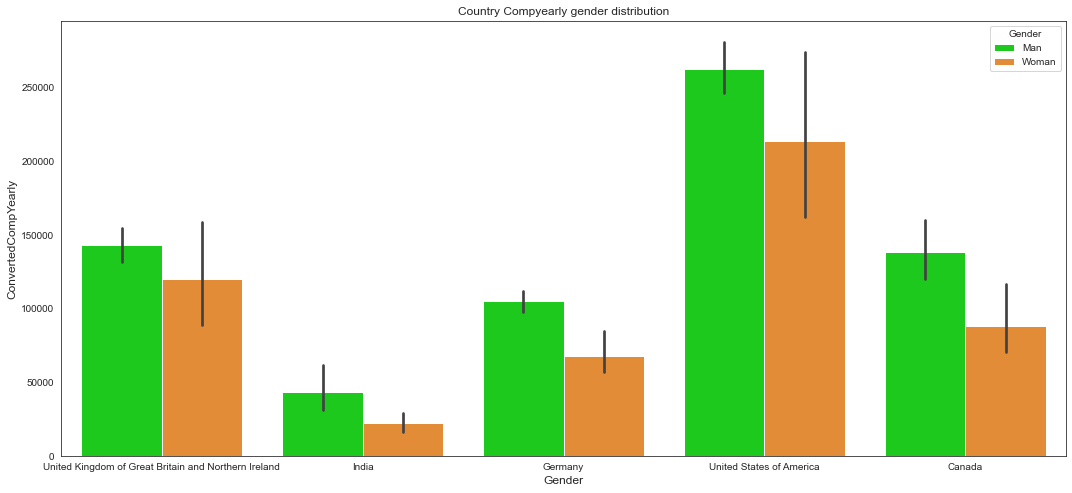

In [145]:
fig, ax = plt.subplots(figsize=(18,8))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="Country", y="ConvertedCompYearly",hue="Gender", palette=colors, data=top_cnt)
ax.set_title("Country Compyearly gender distribution",fontdict= {'size':12})
ax.xaxis.set_label_text("Gender",fontdict= {'size':12})
ax.yaxis.set_label_text("ConvertedCompYearly",fontdict= {'size':12})
plt.show()

**Gender Equality Check**

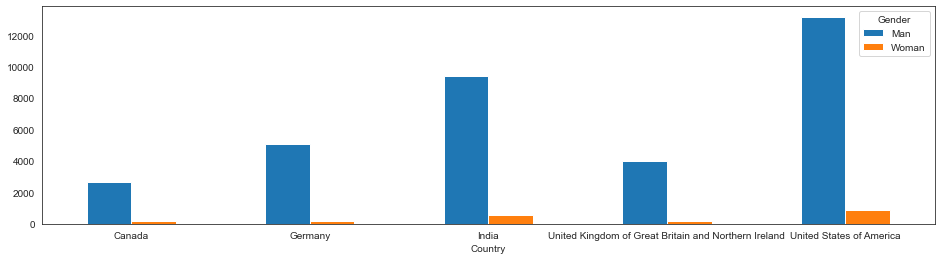

In [146]:
Gender_eq=pd.crosstab(index=top_cnt['Country'],columns=top_cnt['Gender'])
#print(Gender_eq)
 
# Grouped bar chart between Gender and Country
Gender_eq.plot.bar(figsize=(16,4), rot=0)
plt.show()

**Outliers**

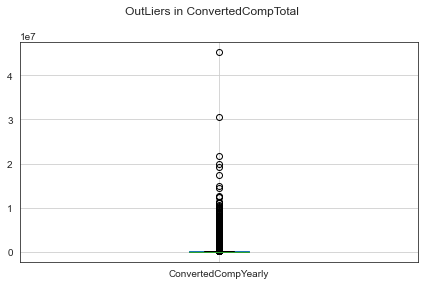

In [147]:
fig, axes = plt.subplots(nrows=1, ncols=1)

data.boxplot(column='ConvertedCompYearly')
plt.suptitle('OutLiers in ConvertedCompTotal')  # Suppress the overall title
plt.tight_layout()  # Increase the separation between the plots

plt.show()

In [148]:
data.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'EdLevel',
       'Age1stCode', 'LearnCode', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [149]:
data['LanguageWantToWorkWith'].value_counts()

Python                                                                             1389
Rust                                                                                821
HTML/CSS;JavaScript;Node.js;TypeScript                                              812
C#                                                                                  700
Java                                                                                512
                                                                                   ... 
C#;HTML/CSS;Java;JavaScript;Node.js;Objective-C;PHP;Python;SQL;Swift;TypeScript       1
C#;Elixir;Erlang;HTML/CSS;JavaScript;Python;Ruby;Rust;SQL                             1
C#;Go;JavaScript;Kotlin;Node.js;Python;SQL;Swift;TypeScript                           1
Bash/Shell;C;C++;HTML/CSS;Java;JavaScript;Objective-C;PHP;PowerShell;SQL              1
Elixir;HTML/CSS;Java;JavaScript;Node.js;PHP;SQL;TypeScript                            1
Name: LanguageWantToWorkWith, Le

In [150]:
data=data.dropna()

In [151]:
X=data.drop(columns=['ConvertedCompYearly'])
y=data['ConvertedCompYearly']

In [152]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [153]:
#separating categorical and num data
cat_data=X.select_dtypes(include='object')
num_data=X.select_dtypes(exclude='object')

In [154]:
print(cat_data.columns)

Index(['MainBranch', 'Employment', 'Country', 'EdLevel', 'Age1stCode',
       'LearnCode', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize',
       'Currency', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSys', 'NEWStuck', 'NEWSOSites',
       'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'NEWOtherComms',
       'Age', 'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Accessibility',
       'MentalHealth', 'SurveyLength', 'SurveyEase'],
      dtype='object')


In [155]:
#label encoding on cat data
for col in cat_data.columns:
    cat_data[col]=le.fit_transform(cat_data[col])

In [156]:
X_new=pd.concat([cat_data,num_data],axis=1)

# Applying standard scaler to normalize the features

In [157]:
X_new= StandardScaler().fit_transform(X_new)

# Spliting Dataset into 70% Training and 30% Testing

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.30, random_state=100)

# Machine Learning Algorithms

# Training SVR Algorithm

In [159]:
start = time.time()
svr_model=SVR()
sv_trained_model= svr_model.fit(X_train, y_train)
end = time.time()
sv_1_time=end-start
sv_trained_model

SVR()

In [160]:
print('Execution time of SVR is ', sv_1_time)

Execution time of SVR is  2.4621846675872803


# Evaluation of SVR Trained model

In [168]:
y_pred = sv_trained_model.predict(X_test)
MAE1=median_absolute_error(y_test,y_pred)
print('Mean Absolute error: ', MAE1)
mse1=mean_squared_error(y_test,y_pred)
print('Mean Squared error: ', mse1)
rmse1 = math.sqrt(mse1)
print('Root mean squared error: ', rmse1)

Mean Absolute error:  34610.34665037373
Mean Squared error:  187824365037.13226
Root mean squared error:  433387.0845296757


# Training Random Forest Algorithm 

In [169]:
start = time.time()
knn_model=RandomForestRegressor()
knn_trained_model= knn_model.fit(X_train , y_train)
end = time.time()
kn_1_time=end-start
knn_trained_model

RandomForestRegressor()

In [170]:
print('Execution time of KNN is ', kn_1_time)

Execution time of KNN is  8.123716831207275


# Evalutaion of Random Forest Trained model

In [171]:
y_pred = knn_trained_model.predict(X_test)
MAE2=median_absolute_error(y_test,y_pred)
print('Mean Absolute error: ', MAE2)
mse2=mean_squared_error(y_test,y_pred)
print('Mean Squared error: ', mse2)
rmse2 = math.sqrt(mse2)
print('Root mean squared error: ', rmse2)

Mean Absolute error:  5753.92
Mean Squared error:  49139833160.26767
Root mean squared error:  221675.06210728275


# Training Linear Regression Algorithm 

In [172]:
start = time.time()
dtc_model=LinearRegression()
dtc_trained_model= dtc_model.fit(X_train , y_train)
end = time.time()
dt_1_time=end-start
dtc_trained_model

LinearRegression()

In [173]:
print('Execution time of Linear Regression is ', dt_1_time)

Execution time of Linear Regression is  0.015615463256835938


# Evalutaion of Linear Regression Trained model

In [174]:
y_pred = dtc_trained_model.predict(X_test)
MAE3=median_absolute_error(y_test,y_pred)
print('Mean Absolute error: ', MAE3)
mse3=mean_squared_error(y_test,y_pred)
print('Mean Squared error: ', mse3)
rmse3 = math.sqrt(mse3)
print('Root mean squared error: ', rmse3)

Mean Absolute error:  62774.58232107805
Mean Squared error:  181810114655.84015
Root mean squared error:  426391.9730199434


# Comparison of all algorithms on Mean Absolute error

In [175]:
x = PrettyTable()
print('\n')
print("Deatiled Performance of the all models")
x.field_names = ["Model", "Mean Absolute error"]


x.add_row(["SVR Algorithm", round(MAE1,3)])
x.add_row(["Random Forest Algorithm", round(MAE2,3)])
x.add_row(["Linear Regression Algorithm", round(MAE3,3)])
print(x)
print('\n')



Deatiled Performance of the all models
+-----------------------------+---------------------+
|            Model            | Mean Absolute error |
+-----------------------------+---------------------+
|        SVR Algorithm        |      34610.347      |
|   Random Forest Algorithm   |       5753.92       |
| Linear Regression Algorithm |      62774.582      |
+-----------------------------+---------------------+




# Graph of Mean Absolute error of each algorithm

<AxesSubplot:xlabel='Algorithm'>

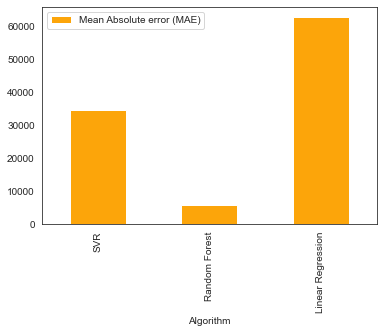

In [176]:
from matplotlib import cm
Result_Comp = pd.DataFrame({'Algorithm':['SVR'], 'Mean Absolute error (MAE)': [MAE1]})
Result_Comp1 = pd.DataFrame({'Algorithm':['Random Forest'], 'Mean Absolute error (MAE)': [MAE2]})
Result_Comp2 = pd.DataFrame({'Algorithm':['Linear Regression'], 'Mean Absolute error (MAE)': [MAE3]})

Result_Comp = pd.concat([Result_Comp, Result_Comp1,Result_Comp2])
Result_Comp.set_index("Algorithm",drop=True,inplace=True)
color = cm.inferno_r(np.linspace(.2, .4, 6))
Result_Comp.plot(kind='bar',figsize=(6, 4),stacked=True, color=color, legend=True)

# Graph of Mean Squared error  of each algorithm

<AxesSubplot:xlabel='Algorithm'>

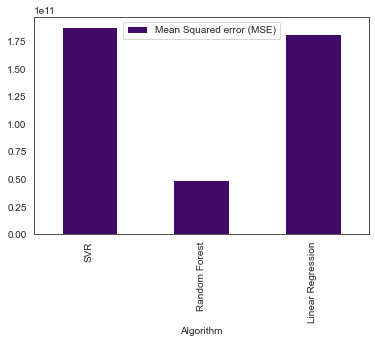

In [177]:
Result_Comp = pd.DataFrame({'Algorithm':['SVR'], 'Mean Squared error (MSE)': [mse1]})
Result_Comp1 = pd.DataFrame({'Algorithm':['Random Forest'], 'Mean Squared error (MSE)': [mse2]})
Result_Comp2 = pd.DataFrame({'Algorithm':['Linear Regression'], 'Mean Squared error (MSE)': [mse3]})

Result_Comp = pd.concat([Result_Comp, Result_Comp1,Result_Comp2])
Result_Comp.set_index("Algorithm",drop=True,inplace=True)
color = cm.inferno_r(np.linspace(0.8, 0.5, 2))
Result_Comp.plot(kind='bar', figsize=(6, 4),color=color)

# Graph of Root mean squared error of each algorithm

<AxesSubplot:xlabel='Algorithm'>

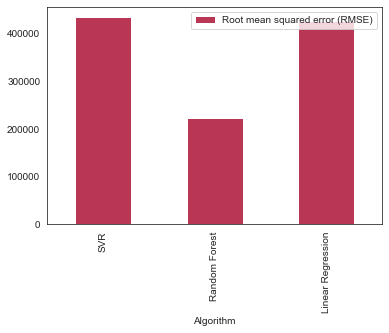

In [178]:
Result_Comp = pd.DataFrame({'Algorithm':['SVR'],'Root mean squared error (RMSE)': [rmse1]})
Result_Comp1 = pd.DataFrame({'Algorithm':['Random Forest'], 'Root mean squared error (RMSE)': [rmse2]})
Result_Comp2 = pd.DataFrame({'Algorithm':['Linear Regression'], 'Root mean squared error (RMSE)': [rmse3]})

Result_Comp = pd.concat([Result_Comp, Result_Comp1,Result_Comp2])
Result_Comp.set_index("Algorithm",drop=True,inplace=True)
color = cm.inferno_r(np.linspace(0.5, 0.2, 7))
Result_Comp.plot(kind='bar', figsize=(6, 4),color=color)

# Best Results

In [179]:
x = PrettyTable()
print('\n')
print("Best Model.")
x.field_names = ["Model", "Mean Absolute error"]
x.add_row(["Random Forest Algorithm",round(MAE2,3)])
print(x)
print('\n')



Best Model.
+-------------------------+---------------------+
|          Model          | Mean Absolute error |
+-------------------------+---------------------+
| Random Forest Algorithm |       5753.92       |
+-------------------------+---------------------+




# But if we talk about their training time, then Linear Regreesion took very less time as compare to Random Forest algorithm.

In [180]:
x = PrettyTable()
print('\n')
print("Deatiled Performance of the all models")
x.field_names = ["Model", "Training time"]


x.add_row(["SVR Algorithm", round(sv_1_time,3)])
x.add_row(["Random Forest Algorithm", round(kn_1_time,3)])
x.add_row(["Linear Regression Algorithm", round(dt_1_time,3)])
print(x)
print('\n')



Deatiled Performance of the all models
+-----------------------------+---------------+
|            Model            | Training time |
+-----------------------------+---------------+
|        SVR Algorithm        |     2.462     |
|   Random Forest Algorithm   |     8.124     |
| Linear Regression Algorithm |     0.016     |
+-----------------------------+---------------+


